In [1]:
import numpy as np
import math
import matplotlib as plt
from matplotlib import pyplot
pyplot.rcParams['text.usetex'] = True
plt.matplotlib_fname()
plt.style.use('classic')

In [2]:
conf = 1

In [3]:
if conf==1:
    R = np.array([99.7, 90.05, 80.0, 70.1, 60.1, 50.1, 40.0, 30.0, 20.0, 10.1])
    V1 = np.array([1175.00,1143.75,1087.50,1031.25,956.25,875.00,775.00,637.50,462.50,256.25])
    V2 = np.array([-143.75,-154.50,-143.75,-143.75,-143.75,-125.00,-125.00,-100.00,-75.00,-62.50])
    V = V1-V2
    V0 = 1005
    w_R = 0.008*R+0.05
    w_V1 = 0.03*V1+0.05
    w_V2 = 0.03*V2+0.05
    w_V0 = 0.03*V0+0.05
    w_V = np.sqrt(w_V1**2+w_V2**2)
    print(w_V)

[35.55641864 34.66703955 32.95185171 31.27929127 29.0518986  26.55899094
 23.59194778 19.400596   14.09771701  7.94981328]


In [4]:
if conf==2:
    R = np.array([99.8, 90.00, 80.00, 70.00, 60.00, 50.00, 40.00, 30.10, 20.00, 10.00])
    V1 = np.array([-1237.50,-1200.00,-1155.00,-1102.50,-1050.00,-967.50,-867.50,-720.00,-505.00,-272.50])
    V2 = np.array([37.50,37.50,15.00,15.00,15.00,15.00,15.00,15.00,15.00,15.00])
    V = V1-V2
    V0 = -(1593.75+37.5)/2
    #V0 = 1005
    w_R = 0.008*R+0.05
    w_V1 = 0.03*V1+0.05
    w_V2 = 0.03*V2+0.05
    w_V0 = 0.03*V0+0.05
    w_V = np.sqrt(w_V1**2+w_V2**2)
    print(w_V)

$$\frac{1}{T} = \frac{Z_{cabo}}{2R} + \frac{1}{2}$$

In [5]:
print(V)

[1318.75 1298.25 1231.25 1175.   1100.   1000.    900.    737.5   537.5
  318.75]


In [6]:
y = V0/V
x = 1./(2*R)
w_x = 1./(2.*R**2)*w_R
w_y = np.sqrt(1./(V**2)*w_V0**2+V0**2/(V**4)*w_V**2)
w=np.sqrt(w_x**2+w_y**2)
sigma = 1/math.sqrt((1/w**2).sum())

In [7]:
print("(Sanity check) Should be 1: ", ((sigma/w)**2).sum())

(Sanity check) Should be 1:  1.0


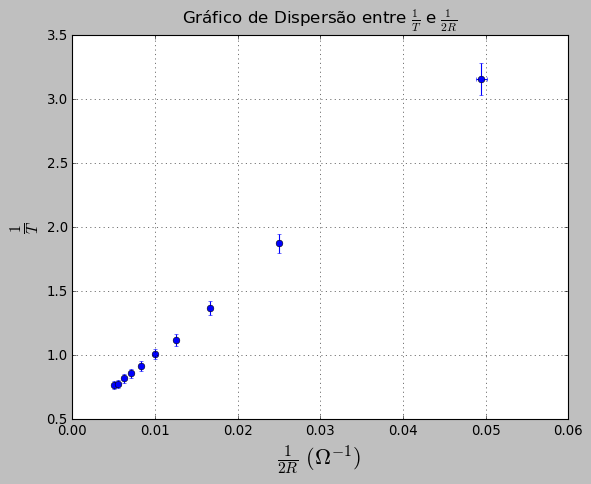

In [8]:
pyplot.errorbar(x,y,xerr=w_x,yerr=w_y,fmt = 'o',elinewidth = 1., capsize=2.)
pyplot.title(r'Gráfico de Dispersão entre $\frac{1}{T}$ e $\frac{1}{2R}$',fontsize=15,pad=10)
pyplot.xlabel(r'$\frac{1}{2R} \ (\Omega^{-1})$ ',fontsize=20)
pyplot.ylabel(r'$\frac{1}{T}$',fontsize=20)
pyplot.grid()
pyplot.show()

In [9]:
y_mean = y.mean()
x_mean = x.mean()
y2_mean = (y*y).mean()
x2_mean = (x*x).mean()
y_std = np.sqrt(y2_mean-y_mean**2)
x_std = np.sqrt(x2_mean-x_mean**2)
yx = y*x
cov_yx = yx.mean() - y_mean*x_mean
r = cov_yx/(y_std*x_std)
a = cov_yx/(x_std**2)
ep_y = y_std*np.sqrt(4./2.*(1.-r**2))
a_std = (ep_y/2)/x_std
b = y_mean - a*x_mean
b_std = a_std*math.sqrt(x2_mean)
print("a = ", a, " $\pm$ ", a_std)
print("b = ", b, " $\pm$ ", b_std)

a =  54.37553822449246  $\pm$  1.0223922234151483
b =  0.4693940957316328  $\pm$  0.01999424040425294


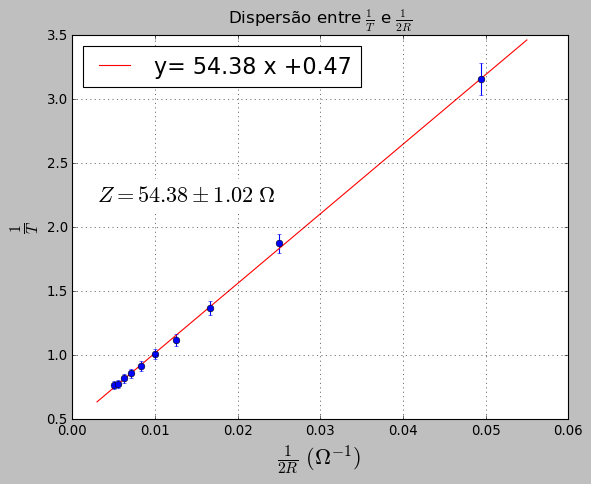

In [10]:
x_fit = np.linspace(0.003,0.055,100)
y_fit = a*x_fit+b
pyplot.plot(x_fit, y_fit, '-r', label='y= {0:.2f} x +{1:.2f}'.format(a,b))
pyplot.errorbar(x,y,yerr=w_y,fmt = 'o',elinewidth = 1., capsize=2.)
pyplot.title(r'Dispersão entre $\frac{1}{T}$ e $\frac{1}{2R}$',fontsize=15,pad=10)
pyplot.xlabel(r'$\frac{1}{2R} \ (\Omega^{-1})$ ',fontsize=20)
pyplot.ylabel(r'$\frac{1}{T}$',fontsize=20)
pyplot.legend(loc='upper left',fontsize=20)
pyplot.text(s=r'$Z = {0:.2f} \pm {1:.2f}\ \Omega$'.format(a,a_std),x=0.003,y=2.2,fontsize=20,backgroundcolor='white')
pyplot.grid()
pyplot.show()

Podemos perceber que existem comportamentos distintos na região de baixos valores de $\frac{1}{2R}$ quando comparada a altos valores de $\frac{1}{2R}$. Vamos fazer dois plots separados, portanto, utilizando os cinco primeiros pontos e posteriormente com os cinco últimos pontos.

In [11]:
y_low  = y[0:5]
y_high = y[5:10]
x_low  = x[0:5]
x_high = x[5:10]
w_x_low  = w_x[0:5]
w_x_high = w_x[5:10]
w_y_low  = w_y[0:5]
w_y_high = w_y[5:10]
w_low  = w[0:5]
w_high = w[5:10]
sigma_low  = 1/math.sqrt((1/w_low**2).sum())
sigma_high = 1/math.sqrt((1/w_high**2).sum())

In [12]:
print("(Sanity check) Should be 1: ", ((sigma_low/w_low)**2).sum())
print("(Sanity check) Should be 1: ", ((sigma_high/w_high)**2).sum())

(Sanity check) Should be 1:  1.0
(Sanity check) Should be 1:  0.9999999999999999


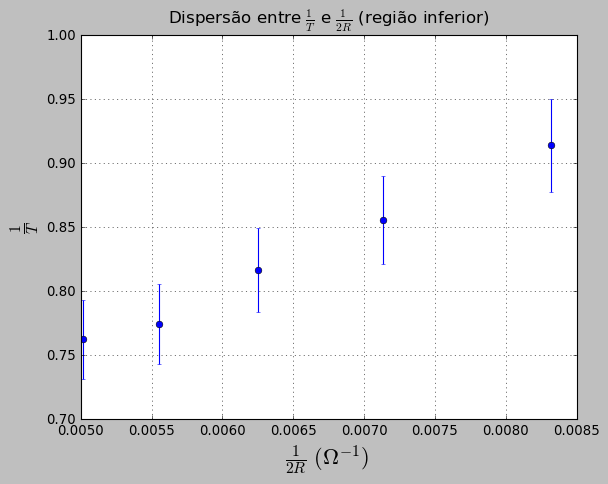

In [13]:
pyplot.errorbar(x_low,y_low,yerr=w_y_low,fmt = 'o',elinewidth = 1., capsize=2.)
pyplot.title(r'Dispersão entre $\frac{1}{T}$ e $\frac{1}{2R}$ (região inferior)',fontsize=15, pad=10)
pyplot.xlabel(r'$\frac{1}{2R} \ (\Omega^{-1})$ ',fontsize=20)
pyplot.ylabel(r'$\frac{1}{T}$',fontsize=20)
pyplot.grid()
pyplot.show()

In [14]:
if (conf==1):
    y_low  = y[1:5]
    x_low  = x[1:5]
    w_x_low  = w_x[1:5]
    w_y_low  = w_y[1:5]
    w_low  = w[1:5]
    sigma_low  = 1/math.sqrt((1/w_low**2).sum())
if (conf==2):
    y_low  = y[0:4]
    x_low  = x[0:4]
    w_x_low  = w_x[0:4]
    w_y_low  = w_y[0:4]
    w_low  = w[0:4]
    sigma_low  = 1/math.sqrt((1/w_low**2).sum())

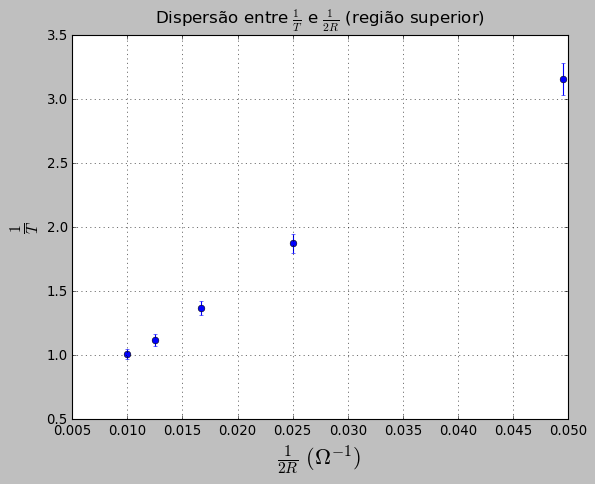

In [15]:
pyplot.errorbar(x_high,y_high,yerr=w_y_high,fmt = 'o',elinewidth = 1., capsize=2.)
pyplot.title(r'Dispersão entre $\frac{1}{T}$ e $\frac{1}{2R}$ (região superior)',fontsize=15,pad=10)
pyplot.xlabel(r'$\frac{1}{2R} \ (\Omega^{-1})$ ',fontsize=20)
pyplot.ylabel(r'$\frac{1}{T}$',fontsize=20)
pyplot.grid()
pyplot.show()

In [16]:
y_mean_low = y_low.mean()
x_mean_low = x_low.mean()
y2_mean_low = (y_low*y_low).mean()
x2_mean_low = (x_low*x_low).mean()
y_std_low = np.sqrt(y2_mean_low-y_mean_low**2)
x_std_low = np.sqrt(x2_mean_low-x_mean_low**2)
yx_low = y_low*x_low
cov_yx_low = yx_low.mean() - y_mean_low*x_mean_low
r_low = cov_yx_low/(y_std_low*x_std_low)
a_low = cov_yx_low/(x_std_low**2)
ep_y_low = y_std_low*np.sqrt(4./2.*(1.-r_low**2))
a_std_low = (ep_y_low/2)/x_std_low
b_low = y_mean_low - a_low*x_mean_low
b_std_low = a_std_low*math.sqrt(x2_mean_low)
print("a = ", a_low, " $\pm$ ", a_std_low)
print("b = ", b_low, " $\pm$ ", b_std_low)

a =  49.619257642520346  $\pm$  1.8712063523143394
b =  0.5017412139084059  $\pm$  0.012895752250395588


In [17]:
y_mean_high = y_high.mean()
x_mean_high = x_high.mean()
y2_mean_high = (y_high*y_high).mean()
x2_mean_high = (x_high*x_high).mean()
y_std_high = np.sqrt(y2_mean_high-y_mean_high**2)
x_std_high = np.sqrt(x2_mean_high-x_mean_high**2)
yx_high = y_high*x_high
cov_yx_high = yx_high.mean() - y_mean_high*x_mean_high
r_high = cov_yx_high/(y_std_high*x_std_high)
a_high = cov_yx_high/(x_std_high**2)
ep_y_high = y_std_high*np.sqrt(4./2.*(1.-r_high**2))
a_std_high = (ep_y_high/2)/x_std_high
b_high = y_mean_high - a_high*x_mean_high
b_std_high = a_std_high*math.sqrt(x2_mean_high)
print("a = ", a_high, " $\pm$ ", a_std_high)
print("b = ", b_high, " $\pm$ ", b_std_high)

a =  54.73685039499261  $\pm$  1.1692359207138432
b =  0.45723067971417186  $\pm$  0.03141469118186976


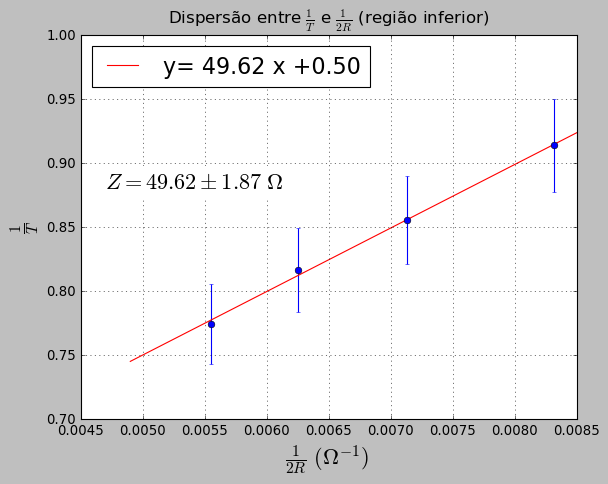

In [18]:
x_fit_low = np.linspace(0.0049,0.0085,50)
y_fit_low = a_low*x_fit_low+b_low
pyplot.plot(x_fit_low, y_fit_low, '-r', label='y= {0:.2f} x +{1:.2f}'.format(a_low,b_low))
pyplot.errorbar(x_low,y_low,yerr=w_y_low,fmt = 'o',elinewidth = 1., capsize=2.)
pyplot.title(r'Dispersão entre $\frac{1}{T}$ e $\frac{1}{2R}$ (região inferior)',fontsize=15,pad=10)
pyplot.xlabel(r'$\frac{1}{2R} \ (\Omega^{-1})$ ',fontsize=20)
pyplot.ylabel(r'$\frac{1}{T}$',fontsize=20)
pyplot.legend(loc='upper left',fontsize=20)
if conf == 1:
    x_text = 0.0047
    y_text = 0.88
if conf == 2:
    x_text = 0.0047
    y_text = 0.74
pyplot.text(s=r'$Z = {0:.2f} \pm {1:.2f}\ \Omega$'.format(a_low,a_std_low),x=x_text,y=y_text,fontsize=20,backgroundcolor='white')
pyplot.grid()
pyplot.show()

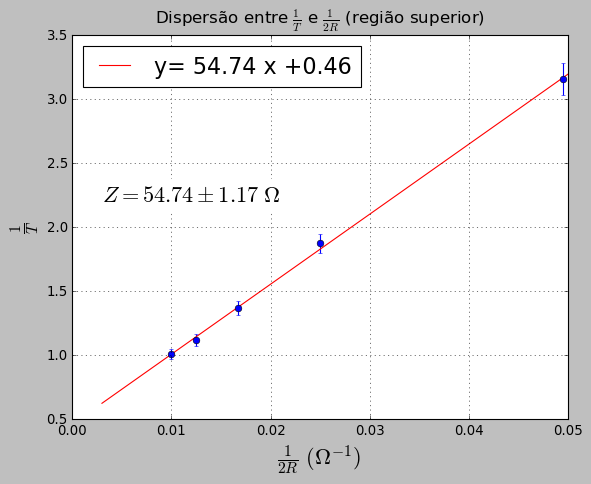

In [19]:
x_fit_high = np.linspace(0.003,0.05,100)
y_fit_high = a_high*x_fit_high+b_high
pyplot.plot(x_fit_high, y_fit_high, '-r', label='y= {0:.2f} x +{1:.2f}'.format(a_high,b_high))
pyplot.errorbar(x_high,y_high,yerr=w_y_high,fmt = 'o',elinewidth = 1., capsize=2.)
pyplot.title(r'Dispersão entre $\frac{1}{T}$ e $\frac{1}{2R}$ (região superior)',fontsize=15,pad=10)
pyplot.xlabel(r'$\frac{1}{2R} \ (\Omega^{-1})$ ',fontsize=20)
pyplot.ylabel(r'$\frac{1}{T}$',fontsize=20)
pyplot.legend(loc='upper left',fontsize=20)
pyplot.text(s=r'$Z = {0:.2f} \pm {1:.2f}\ \Omega$'.format(a_high,a_std_high),x=0.003,y=2.2,fontsize=20,backgroundcolor='white')
pyplot.grid()
pyplot.show()

In [20]:
abs(a_low-50.)/a_std_low

0.20347427583748096

In [21]:
abs(a_high-50.)/a_std_high

4.051235778063217

Ou seja, $$\dfrac{|Z_{\text{medido}}-Z_{\text{ref}}|}{\sigma_Z} < 2$$